The data set contains information about the features of a car, like the number of persons that can fit in the car, maintainence price of maintaining the car, etc. Using this information, car acceptability was determined. 


As car acceptability is a categorical value, I applied both the decision tree classificaion algorithm as well as the random forest classification algorithm.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

In [2]:
car = pd.read_csv('car_evaluation.csv', header = None)

In [3]:
car.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
col = ['buying', 'maint', 'doors', 'persons', 'leg_boot', 'safety', 'outcome' ]

In [5]:
car.columns = col

car.head()

,buying,maint,doors,persons,leg_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Label Encoding the coloumns that are not numerical:

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()

In [8]:
car.buying = le.fit_transform(car.buying)

In [9]:
car.maint =  le.fit_transform(car.maint)

In [10]:
car.leg_boot =  le.fit_transform(car.leg_boot)

In [11]:
car.safety =  le.fit_transform(car.safety)

In [12]:
car.persons =  le.fit_transform(car.persons)
car.doors =  le.fit_transform(car.doors)

In [13]:
car.head()

,buying,maint,doors,persons,leg_boot,safety,outcome
0,3,3,0,0,2,1,unacc
1,3,3,0,0,2,2,unacc
2,3,3,0,0,2,0,unacc
3,3,3,0,0,1,1,unacc
4,3,3,0,0,1,2,unacc


In [14]:
car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
leg_boot    0
safety      0
outcome     0
dtype: int64

Checking the realation between car safety and it's acceptability:

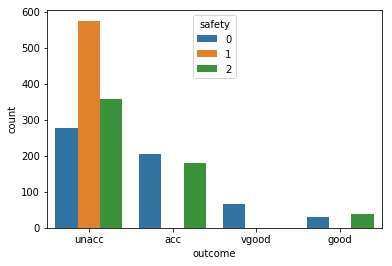

In [15]:
sns.countplot(car.outcome, hue = car.safety)

In [16]:
x = car.iloc[:, :6]

In [17]:
x.head()

,buying,maint,doors,persons,leg_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


The target value that needs to be determined:

In [18]:
y = car.outcome

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 10)

Applying Decision Tree Classification Algorithm:

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
model = DecisionTreeClassifier()

In [23]:
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
predict = model.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
accuracy_score(y_test, predict)

0.9826589595375722

In [27]:
confusion_matrix(y_test, predict)

array([[ 61,   2,   1,   0],
       [  0,  13,   0,   0],
       [  0,   0, 251,   0],
       [  1,   2,   0,  15]], dtype=int64)

In [28]:
print(classification_report(y_test, predict))

             precision    recall  f1-score   support

        acc       0.98      0.95      0.97        64
       good       0.76      1.00      0.87        13
      unacc       1.00      1.00      1.00       251
      vgood       1.00      0.83      0.91        18

avg / total       0.99      0.98      0.98       346



Applying RandomForest Classification Algorithm:

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
model1 = RandomForestClassifier(n_estimators=20)

In [32]:
model1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
predict1 = model1.predict(x_test)

In [34]:
accuracy_score(y_test, predict1)

0.976878612716763

In [35]:
print(classification_report(y_test, predict1))

             precision    recall  f1-score   support

        acc       0.94      0.94      0.94        64
       good       0.86      0.92      0.89        13
      unacc       1.00      1.00      1.00       251
      vgood       0.94      0.89      0.91        18

avg / total       0.98      0.98      0.98       346



In [36]:
confusion_matrix(y_test, predict1)

array([[ 60,   2,   1,   1],
       [  1,  12,   0,   0],
       [  1,   0, 250,   0],
       [  2,   0,   0,  16]], dtype=int64)

I trained two algorithms on the same dataset:

The Decision Tree Classifier model predicted the acceptability of cars with an accuracy of about 98.26%

and 

The Random Forest Classifier model predicted the acceptability of cars with an accuracy of about 97.68%


However, even though the decision tree classifier model performed better overall, it misclassified a lot of cars that belonged in the 'good' category while the random forest classifier model classified more cars in the 'good' category properly.

Thus, I would choose to use the Random Forest Classifier model. 